### Name: Thushal Babukumar ||  ID  : 46154469 || Portfolio-1 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [3]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [4]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.shape

(251, 362)

The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

#### Joining the Strava and Cheetah dataset and assigning it to variable df

In [5]:
df = strava.join(cheetah, how='inner')


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


In [6]:
#Shape of the dataset
df.shape

(243, 372)

### Q1) Dropping commutes and MTB rides from our data set

In [7]:
#Q1)Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides


df_clean = df.drop(df.index[df['device_watts'] == False])
    
    





### *Dropping Null values from our data set*

In [8]:
#checking how many columns have null values
df_clean.isnull().sum()

average_heartrate      22
average_temp           45
average_watts           4
device_watts            4
distance                0
                       ..
Rest HF                 0
HRV Recovery Points     0
NP                      0
IF                      0
TSS                     0
Length: 372, dtype: int64

In [9]:
#removing null values using dropna() method
cleandf = df_clean.dropna()

In [10]:
#shape of new dataset
cleandf.shape

(144, 372)

In [11]:
#information about the dataset
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2018-01-27 19:39:49+00:00 to 2019-07-27 23:55:13+00:00
Columns: 372 entries, average_heartrate to TSS
dtypes: float64(171), int64(195), object(6)
memory usage: 419.6+ KB


### Q2) Exploring variable distributions in our cleaned data set

### *Distance distribution*
### *Comment: We see that maximum rides are about 60 miles with a few outliers*

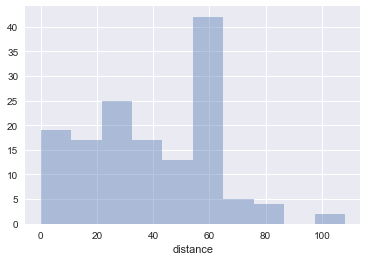

In [12]:
#Q2)Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

sns.distplot(cleandf['distance'], bins=10, kde=False)


### *Average Speed distribution*
### *Comment: We see that the average speed of rides are clocker at around 22-24 mph*

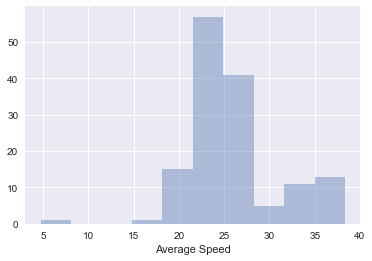

In [13]:
sns.distplot(cleandf['Average Speed'], bins=10, kde=False)

### *TSS distribution*
### *Comment: We see that most of the TSS scores are either low or in the mid range*

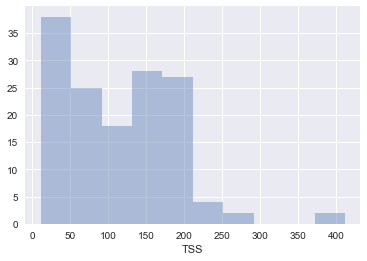

In [14]:
sns.distplot(cleandf['TSS'], bins=10, kde=False)

### *Average Power distribution*
### *Comment: We see that the average power of all our rides are measured at around 150 kwh*

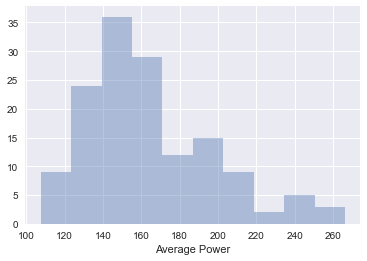

In [15]:
sns.distplot(cleandf['Average Power'], bins=10, kde=False)

### Q3) Exploring correlationships between various variables in our clean data set

In [16]:
#making elevation has a float integer so we can use it as numerical variable
A = ['distance','Average Power', 'average_heartrate', 'Average Speed', 'NP', 'moving_time','TSS','elevation_gain','workout_type' ]
B = cleandf.columns.to_list()
C = list()
for i in B:
    if i not in A:
        C.append(i)
        
newdf = cleandf.drop(C, axis=1)
list3 = list()
list2=list()
list1 = newdf['elevation_gain'].to_list()
for i in list1:
    x= i.replace('m','')
    list2.append(x)
    
list5=list()
for y in list2:
    z = float(y)
    list5.append(z)
    
newdf['elevation_gain'] = list5

### *Building a correlation matrix and heatmap to show the interdepedency of different variables*

[Text(0.5, 0, 'average_heartrate'),
 Text(1.5, 0, 'distance'),
 Text(2.5, 0, 'elevation_gain'),
 Text(3.5, 0, 'moving_time'),
 Text(4.5, 0, 'Average Speed'),
 Text(5.5, 0, 'Average Power'),
 Text(6.5, 0, 'NP'),
 Text(7.5, 0, 'TSS')]

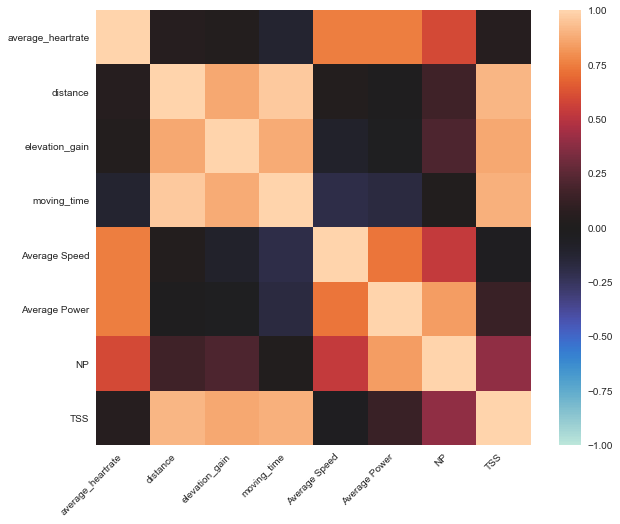

In [17]:
corr = newdf.corr()
fig, ax = plt.subplots(figsize=(10, 8)) 
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

In [18]:
#correlation matrix
corr

,average_heartrate,distance,elevation_gain,moving_time,Average Speed,Average Power,NP,TSS
average_heartrate,1.000000,0.053572,0.037026,-0.115809,0.752000,0.756565,0.595600,0.050514
distance,0.053572,1.000000,0.869634,0.968509,0.034581,-0.010553,0.156948,0.909636
elevation_gain,0.037026,0.869634,1.000000,0.880674,-0.089907,-0.031666,0.205713,0.872069
moving_time,-0.115809,0.968509,0.880674,1.000000,-0.191268,-0.167687,0.030939,0.897096
Average Speed,0.752000,0.034581,-0.089907,-0.191268,1.000000,0.731292,0.536113,-0.030817
Average Power,0.756565,-0.010553,-0.031666,-0.167687,0.731292,1.000000,0.841682,0.136925
NP,0.595600,0.156948,0.205713,0.030939,0.536113,0.841682,1.000000,0.397483
TSS,0.050514,0.909636,0.872069,0.897096,-0.030817,0.136925,0.397483,1.000000


### *Based on the correlation heatmap let us pick out few positive and negative correlations and display using a Scatter plot*

### *Correlation between Avg. Power vs Avg. Heartrate*

### *Comment: A positive correlation indicates that as the heartate increases the Average power outputed for a ride increases*

Text(0.5, 1.0, 'Average Power vs Average Heartrate')

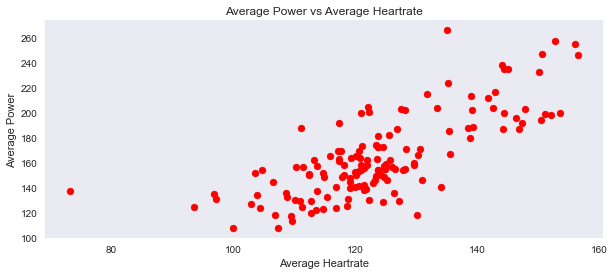

In [22]:

x=newdf['average_heartrate']

y=newdf['Average Power']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y, color='r')
plt.grid(None)
plt.xlabel("Average Heartrate")
plt.ylabel("Average Power")
plt.title('Average Power vs Average Heartrate')

### *Correlation between Avg. Power vs Moving_time*
### *Comment: A slightly negative correlation indicates that as the moving_time increases the Average power outputed for a ride decreases*

Text(0.5, 1.0, 'Average Power vs Moving_time')

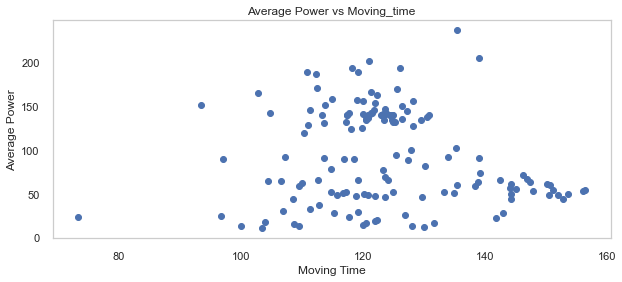

In [28]:

y=newdf['Average Power']

y=newdf['moving_time']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y, color='b')
plt.grid(None)
plt.xlabel("Moving Time")
plt.ylabel("Average Power")
plt.title('Average Power vs Moving_time')

### *Correlation between TSS vs Distance*
### *Comment: A slightly positive correlation indicates that as the distance increases the Training Stress Scores for a ride increases. We will see later on that Rides usually cover more distances hence the TSS for rides are higher than Race or Workout*

Text(0.5, 1.0, 'TSS vs Distance')

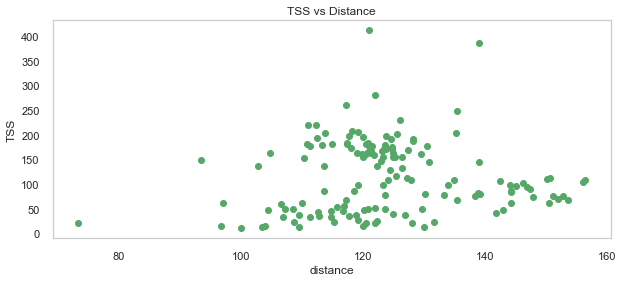

In [29]:

y=newdf['distance']

y=newdf['TSS']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y, color='g')
plt.grid(None)
plt.xlabel("distance")
plt.ylabel("TSS")
plt.title('TSS vs Distance')

### Q4) Exploring the differnt types workouts in our data

### *There are three types of workouts*

In [30]:
#checking different types of workout types in our data
types = cleandf['workout_type']
print('Different type of workouts in our data set: ' , set(types))

Different type of workouts in our data set:  {'Ride', 'Workout', 'Race'}


### *We see that the workout type  'Ride' has the most data points in our data set*

[Text(0, 0, 'Ride'), Text(0, 0, 'Race'), Text(0, 0, 'Workout')]

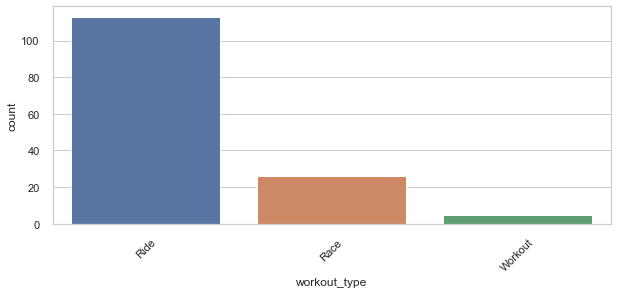

In [31]:
#checking the number of data points for each workout type
plt.figure(figsize=(10,4))
sns.set(style='whitegrid')
chart = sns.countplot(x='workout_type', data=cleandf)
chart.set_xticklabels(chart.get_xticklabels(), rotation =45)


### *We see that the Distance travelled for a 'Ride' is higher than the rest*
### *Comment: Rides usually are for longer distamnce than a Race or a workout*

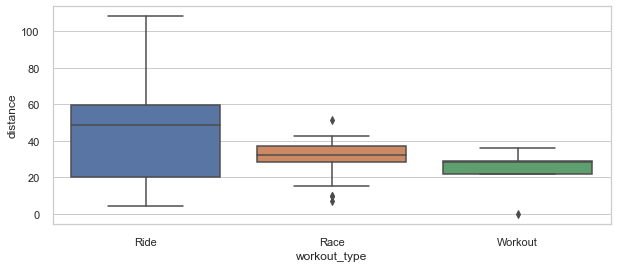

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.boxplot(x='workout_type', y = 'distance', data=cleandf, orient='v')

### *We see that the 'average power' .i.e. the amount of effort being put into a ride for a 'Race' is higher than the rest*
### *Comment: This could be because riding during a Race could be more demanding*

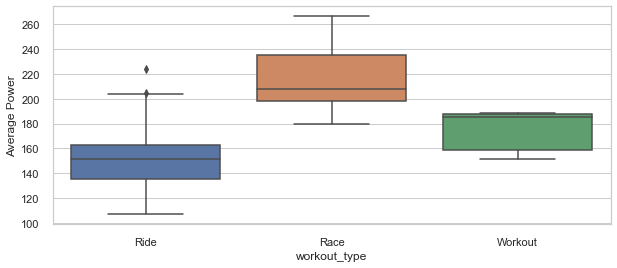

In [27]:
#exploring how much average power it takes for the three differnt work out types
sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.boxplot(x='workout_type', y = 'Average Power', data=cleandf, orient='v')


### *We see that the time taken for Rides are much higher than the rest*
### *Comment: This is because a Ride would normally cover  large distances than an intense Race or work out*

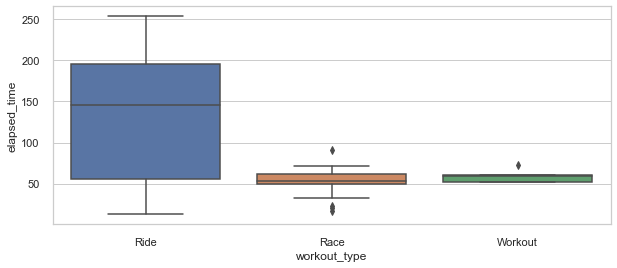

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.boxplot(x='workout_type', y = 'elapsed_time', data=cleandf, orient='v')

### *We see that the 'Average Speed' is high for a Race than the others*
### *Comment: Since Race's usually have the objective that participants need to finish fast to win, we see that the average speed for a Race is much higher*

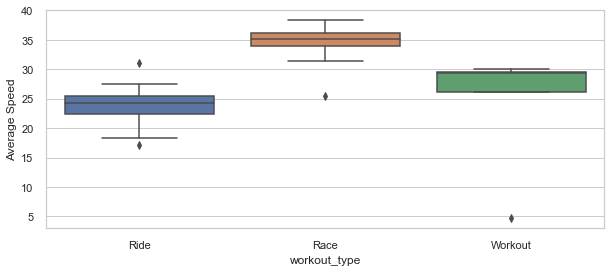

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.boxplot(x='workout_type', y = 'Average Speed', data=cleandf, orient='v')

### *We see that TSS is high for a Ride than the others*
### *Comment: Earlier we saw TSS scores were high for long distances. We also saw Rides are longer distances than Race and Workout. Hence the below boxplot supports our findings*

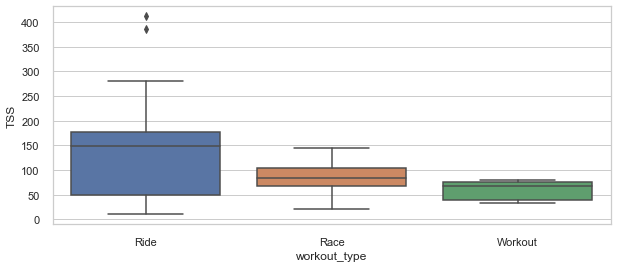

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,4))
sns.boxplot(x='workout_type', y = 'TSS', data=cleandf, orient='v')

### *A Pairplot will give us a brief overview of the differences between the different work outs*

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


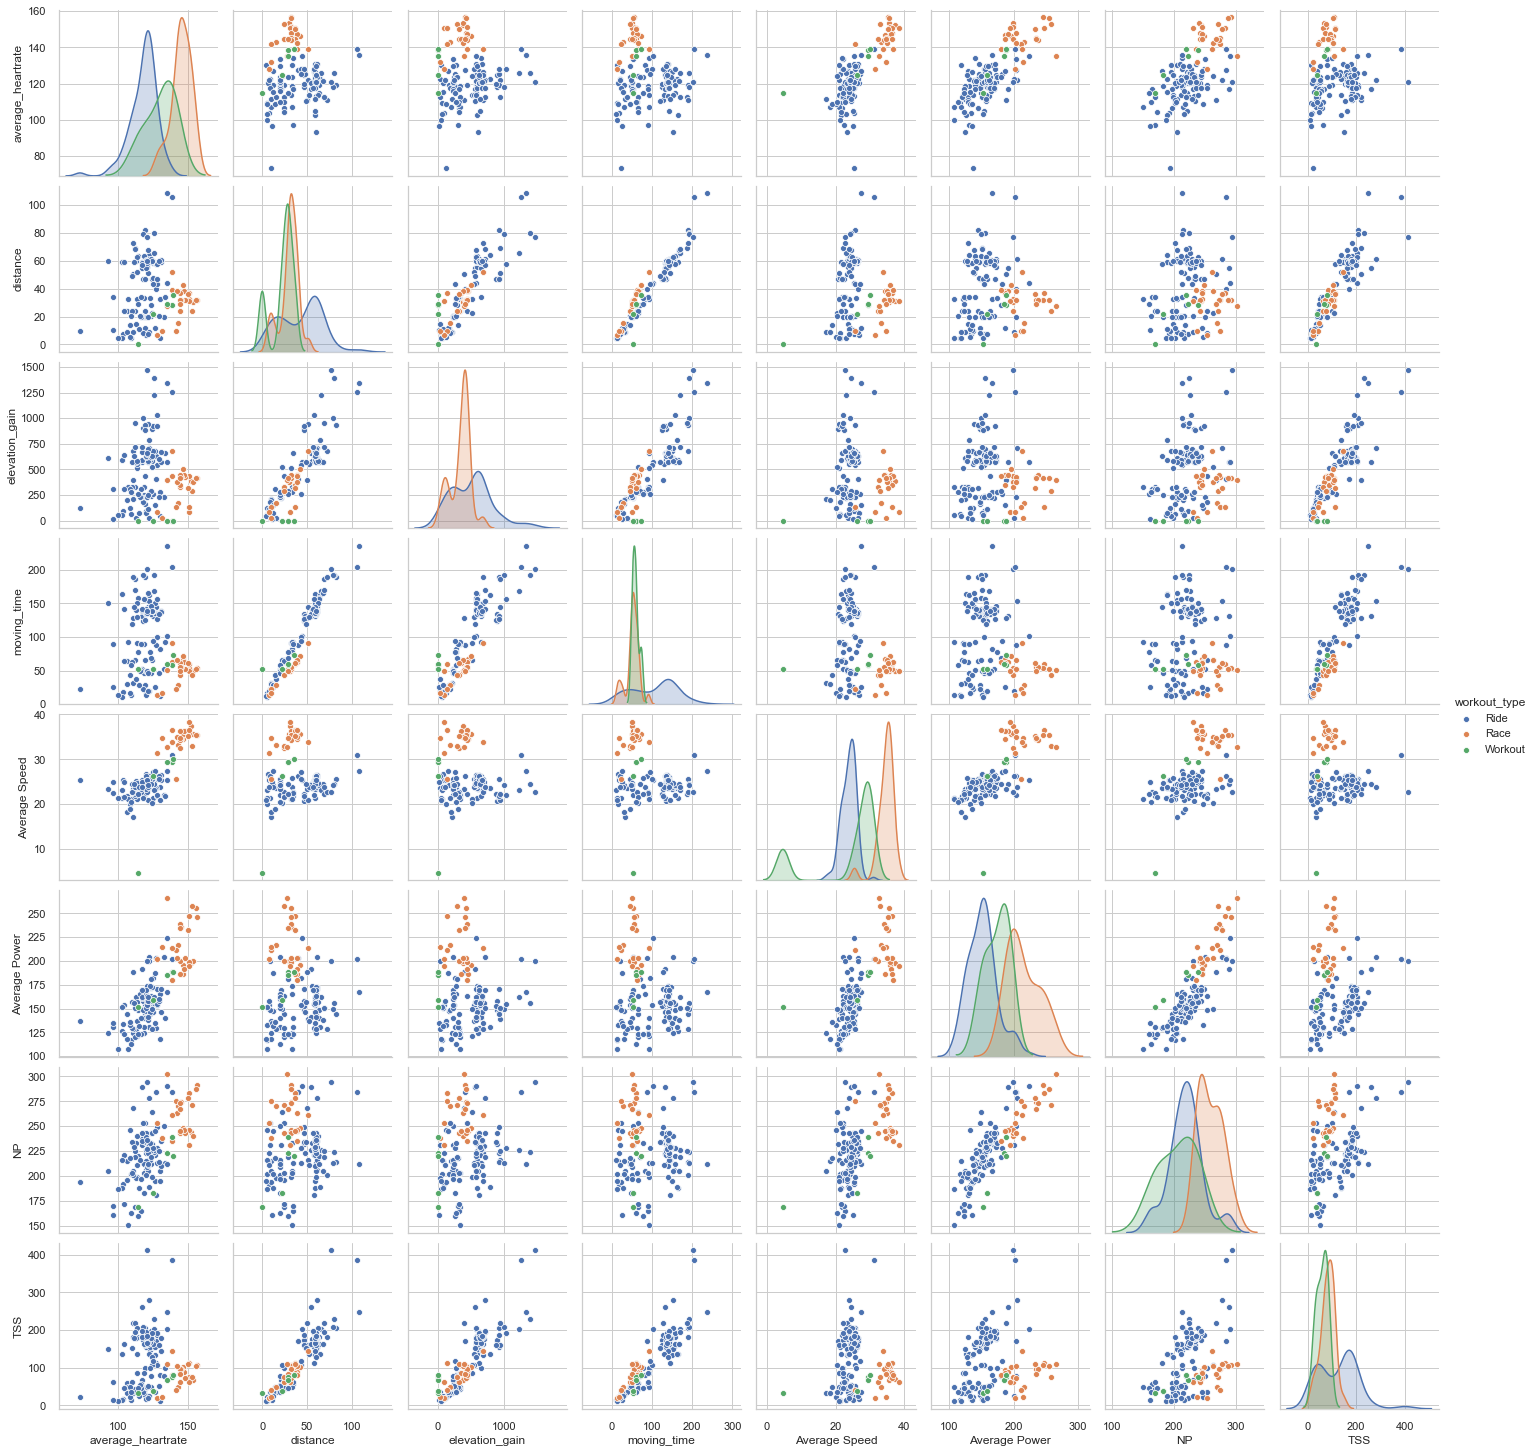

In [30]:
sns.pairplot(newdf, hue='workout_type')

## Q5) Weather and affect on rides

### *Making date column consistent between rides and the weather dataset*

In [33]:
weatherdf18 = pd.read_csv('data/weather_data_2018.csv')
weatherdf19 = pd.read_csv('data/weather_data_2019.csv')
print('No. of data points in 2018 weather data',weatherdf18.shape[0])
print('No. of datapoints in 2019 weather data', weatherdf19.shape[0])


No. of data points in 2018 weather data 365
No. of datapoints in 2019 weather data 365


In [34]:

#Creating a new column in our rides dataset for Date with format yy/mm/dd

newdf['Date'] = newdf.index.to_series().dt.strftime('%d/%m/%y')
newdf.Date
newdf = newdf[['Date','distance','Average Power', 'average_heartrate', 'Average Speed', 'NP', 'moving_time','TSS','elevation_gain','workout_type' ]]


In [35]:
#Joining our two weather datasets into one
weatherdf18['Date'] = pd.to_datetime(weatherdf18[['Day', 'Month', 'Year']])
weatherdf19['Date'] = pd.to_datetime(weatherdf19[['Day', 'Month', 'Year']])
weatherdf18['Date'] = weatherdf18.Date.dt.strftime('%d/%m/%y')
weatherdf19['Date'] = weatherdf19.Date.dt.strftime('%d/%m/%y')
weathernew = [weatherdf18, weatherdf19]
weatherdata = pd.concat(weathernew)
WeatherData = weatherdata[['Date','Maximum temperature (Degree C)' ]]
print('Shape of our whole weather dataset', weatherdata.shape[0])

Shape of our whole weather dataset 730


In [36]:
#Merging our rides and Weatherdata 
fulldf = pd.merge(newdf,WeatherData,on='Date')
fulldf.rename(columns = {'Maximum temperature (Degree C)':'Max Temp'}, inplace = True)
print('Shape of our merged weather and rides dataset', fulldf.shape[0])

Shape of our merged weather and rides dataset 144


### *Relationship between distance travel per ride and the weather*
### *Comment: Although a slightly positive correlation, the relationship can't be interpreted through the overall rides dataset.*

In [37]:
print('Correlation between Distance vs Max Temp:', fulldf['distance'].corr(fulldf['Max Temp']))

Correlation between Distance vs Max Temp: 0.0013880509477505812


Text(0.5, 1.0, 'Distance vs Max_temprature')

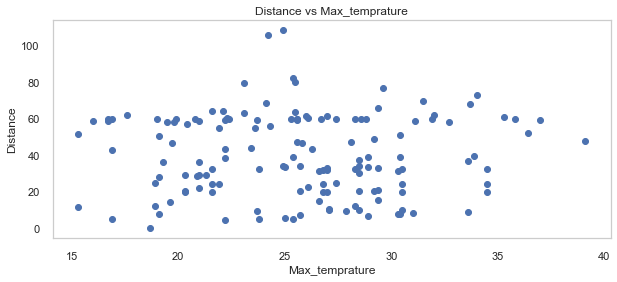

In [41]:
#Scatter plot for distance vs Max_temp

x=fulldf['Max Temp']

y=fulldf['distance']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.grid(None)
plt.xlabel("Max_temprature")
plt.ylabel("Distance")
plt.title('Distance vs Max_temprature')

### *Relationship between Avg. Speed and Temprature*
### *Comment: Although a slightly positive correlation, the relationship can't be interpreted through the overall rides dataset.*

In [42]:

print('Correlation between Avg Speed vs Max Temp:', fulldf['Average Speed'].corr(fulldf['Max Temp']))


Correlation between Avg Speed vs Max Temp: 0.017292693659840395


Text(0.5, 1.0, 'Average Speed vs Temprature')

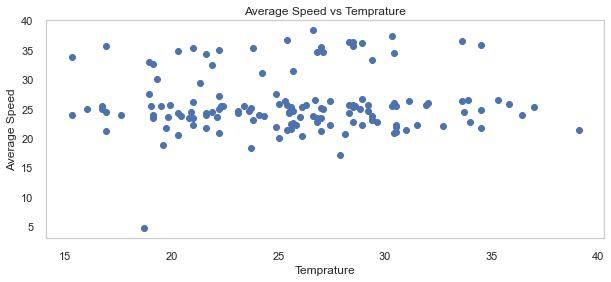

In [43]:


x=fulldf['Max Temp']

y=fulldf['Average Speed']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.grid(None)
plt.xlabel("Temprature")
plt.ylabel("Average Speed")
plt.title('Average Speed vs Temprature')

### *We can see the affect on temprature when we segregate our data according to workout types 'Race', 'Workout' & 'Rides'*

### *Correlation of Max_temp with Avg. Speed of different workout types*
### *Comment: We see that Avg. Speed  of type workout has a higher postivie correlation with Max_temp*

In [65]:


x= fulldf[fulldf.workout_type == 'Workout']['Average Speed'].corr(fulldf[fulldf.workout_type == 'Workout']['Max Temp'])
y= fulldf[fulldf.workout_type == 'Race']['Average Speed'].corr(fulldf[fulldf.workout_type == 'Race']['Max Temp'])
z= fulldf[fulldf.workout_type == 'Ride']['Average Speed'].corr(fulldf[fulldf.workout_type == 'Ride']['Max Temp'])

print('Correlation between Max_temp with type Workout: ', x )
print('Correlation between Max_temp with type Race: ', y )
print('Correlation between Max_temp with type Ride: ', z )


Correlation between Max_temp with type Workout:  0.6624277313331358
Correlation between Max_temp with type Race:  0.1194579073176924
Correlation between Max_temp with type Ride:  0.007688979461256655


### *Although we have minimal datapoints for type workout, we see that as max_temp increases the average power needed for a workout increases*

Text(0.5, 1.0, 'Average Speed vs Temprature')

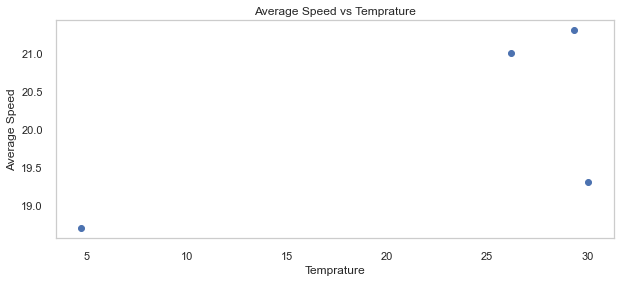

In [67]:
x=fulldf[fulldf.workout_type == 'Workout']['Average Speed']

y=fulldf[fulldf.workout_type == 'Workout']['Max Temp']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.grid(None)
plt.xlabel("Temprature")
plt.ylabel("Average Speed")
plt.title('Average Speed vs Temprature')

### *Correlation of Max_temp with Distance of different workout types*
### *Comment: We see that Distance of type Race has a higher negative correlation with Max_temp*

In [68]:

x= fulldf[fulldf.workout_type == 'Ride']['distance'].corr(fulldf[fulldf.workout_type == 'Ride']['Max Temp'])
y= fulldf[fulldf.workout_type == 'Race']['distance'].corr(fulldf[fulldf.workout_type == 'Race']['Max Temp'])
z= fulldf[fulldf.workout_type == 'Workout']['distance'].corr(fulldf[fulldf.workout_type == 'Workout']['Max Temp'])

print('Correlation between Max_temp with type Ride: ', x )
print('Correlation between Max_temp with type Race: ', y )
print('Correlation between Max_temp with type Workout: ', z )

Correlation between Max_temp with type Ride:  -0.015051986993322844
Correlation between Max_temp with type Race:  -0.25218780846420086
Correlation between Max_temp with type Workout:  0.4735424297975157


### *Clearly we can see that as max_temp increases the distance in Races are decreased. So during hotter days, the race distance is reduced*

Text(0.5, 1.0, 'Average Speed vs Temprature')

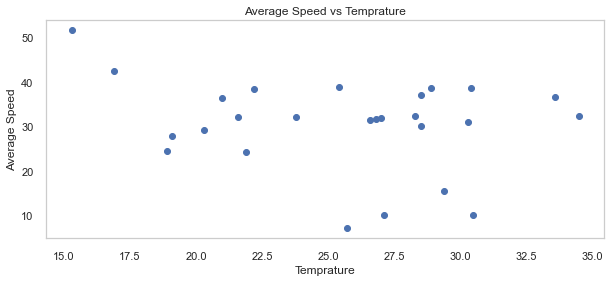

In [69]:
x=fulldf[fulldf.workout_type == 'Race']['Max Temp']
y=fulldf[fulldf.workout_type == 'Race']['distance']

fig= plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.grid(None)
plt.xlabel("Temprature")
plt.ylabel("Average Speed")
plt.title('Average Speed vs Temprature')

##  Conclusions: 

### Distances and time taken for workout type 'Rides' are much larger compare to a Race or a usual Workout. These Rides could be like a endurance race for riders, where they have to travel long miles which test their stamina and edurance. The Test Stress Scores are higher due to this as there is a higher demand in average power and concentration in endurance rides. 

### Races have shorter distances than rides but a little greater than workouts. Races are the most demanding workout type, they have higher avg. speed and avg. power. And as temprature increases race distances are usually lowered

### Workouts are usually in between Races and Rides in terms of all features [Avg. Speed, Avg. Power, Distance travelled, Time Taken]. There is also insufficient data for type workout to make further comments on this category